<a href="https://colab.research.google.com/github/easyymm/DArt-B_Project/blob/main/ToyProject_iPhone_Review_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
stopwords = set([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'isn',
    'Reply', 'Anonymous', 'Comments', 'phone', 'phones', 'hey', 'hi', 'im', 'pls', 'plz', 'day',
    'does', 'don', 'ur', 'ut', 'vki', 'tuj', 'gb', 'user', 'gsmarena', 'year', 'htc', 'lcd',
    'jdrdms', 'jef', 'mah', 'model', 'chchi', 'hz', 'anond', 'thing', 'com', 'isj', 'http', 'iphone'
])

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

In [ ]:
# 리뷰 수집
def get_reviews_from_page(url):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    reviews = soup.find_all('div', class_='user-thread')
    return reviews

# 2012: iPhone 5
'2012-09-21'~'2012-12-21'  

p318~p522   
https://www.gsmarena.com/apple_iphone_5-reviews-4910p318.php

In [ ]:
# iPhone 5 (2012)
all_review_texts_5 = []
for page in range(318, 523):
    url = f'https://www.gsmarena.com/apple_iphone_5-reviews-4910p{page}.php'
    reviews = get_reviews_from_page(url)
    for review in reviews:
        review_text = review.get_text(separator=" ").strip().lower()
        review_text = re.sub(r'\d+', '', review_text)
        all_review_texts_5.append(review_text.strip())

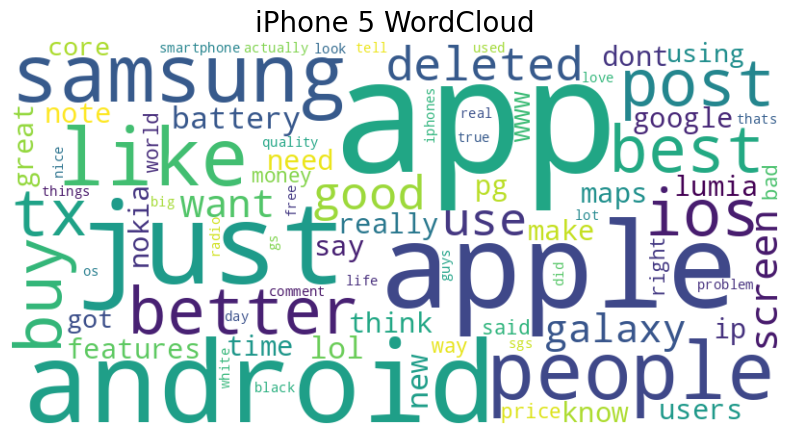

긍정 리뷰 비율: 61.00%
중립 리뷰 비율: 12.41%
부정 리뷰 비율: 26.59%


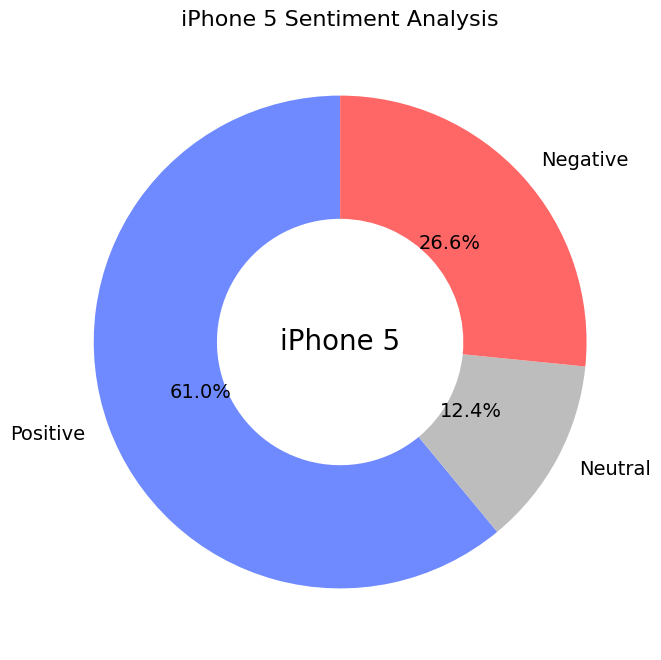

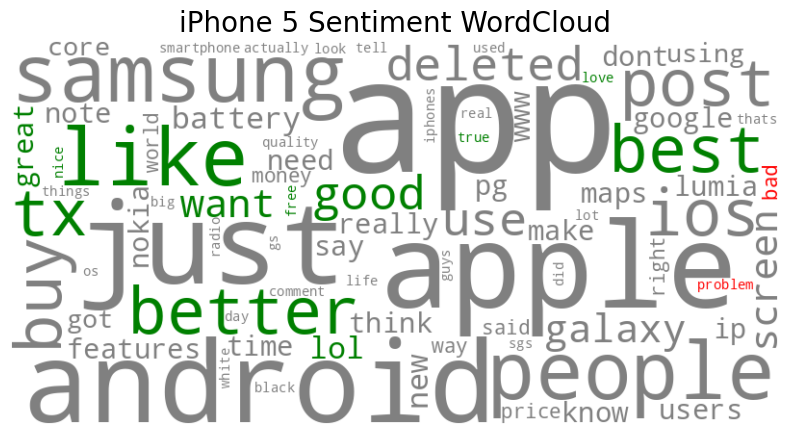

In [ ]:
# 1. TF-IDF 분석
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(all_review_texts_5)
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# 상위 100 단어 추출
top_words = [word for word, score in tfidf_scores[:100]]

# 2. 일반 워드클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 5 WordCloud', fontsize=20)
plt.show()

# 3. 감정 분석
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK 감정 분석기
sid = SentimentIntensityAnalyzer()

positive_reviews, neutral_reviews, negative_reviews = 0, 0, 0
for review in all_review_texts_5:
    sentiment_scores = sid.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.05:
        positive_reviews += 1
    elif sentiment_scores['compound'] <= -0.05:
        negative_reviews += 1
    else:
        neutral_reviews += 1

total_reviews = len(all_review_texts_5)
print(f"긍정 리뷰 비율: {positive_reviews / total_reviews * 100:.2f}%")
print(f"중립 리뷰 비율: {neutral_reviews / total_reviews * 100:.2f}%")
print(f"부정 리뷰 비율: {negative_reviews / total_reviews * 100:.2f}%")

# 4. 감성 분석 도넛 차트
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_reviews / total_reviews * 100, neutral_reviews / total_reviews * 100, negative_reviews / total_reviews * 100]
colors = ['#6f8aff', '#bdbdbd', '#ff6767']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.5}, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.text(0, 0, 'iPhone 5', ha='center', va='center', fontsize=20)
plt.title('iPhone 5 Sentiment Analysis', fontsize=16)
plt.show()

# 5. 긍부정 색상 포함 워드클라우드

# 감정에 따른 색상 지정 함수
def sentiment_color_func(word, *args, **kwargs):
    sentiment_scores = sid.polarity_scores(word)
    if sentiment_scores['compound'] >= 0.05:
        return 'green'  # 긍정
    elif sentiment_scores['compound'] <= -0.05:
        return 'red'    # 부정
    else:
        return 'gray'   # 중립

wordcloud_sentiment = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sentiment.recolor(color_func=sentiment_color_func), interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 5 Sentiment WordCloud', fontsize=20)
plt.show()


# 2014: iPhone 6
'2014-09-19'~'2014-12-19'  

p278~p376  
https://www.gsmarena.com/apple_iphone_6-reviews-6378p278.php


In [ ]:
# iPhone 6 (2014)
all_review_texts_6 = []
for page in range(278, 377):
    url = f'https://www.gsmarena.com/apple_iphone_6-reviews-6378p{page}.php'
    reviews = get_reviews_from_page(url)
    for review in reviews:
        review_text = review.get_text(separator=" ").strip().lower()
        review_text = re.sub(r'\d+', '', review_text)
        all_review_texts_6.append(review_text.strip())

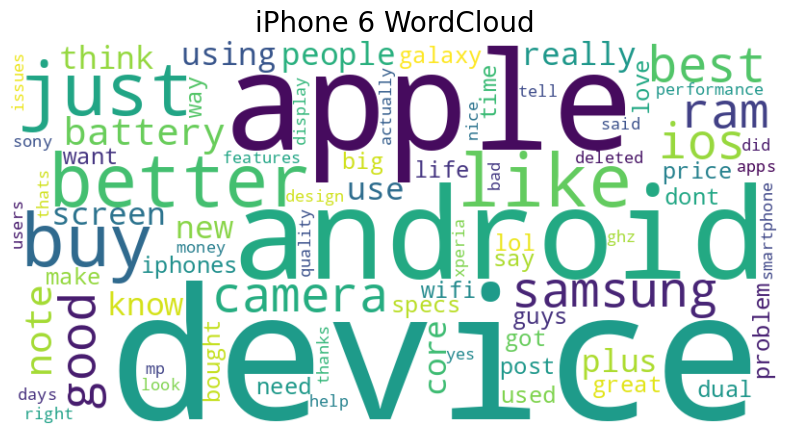

긍정 리뷰 비율: 60.25%
중립 리뷰 비율: 11.94%
부정 리뷰 비율: 27.81%


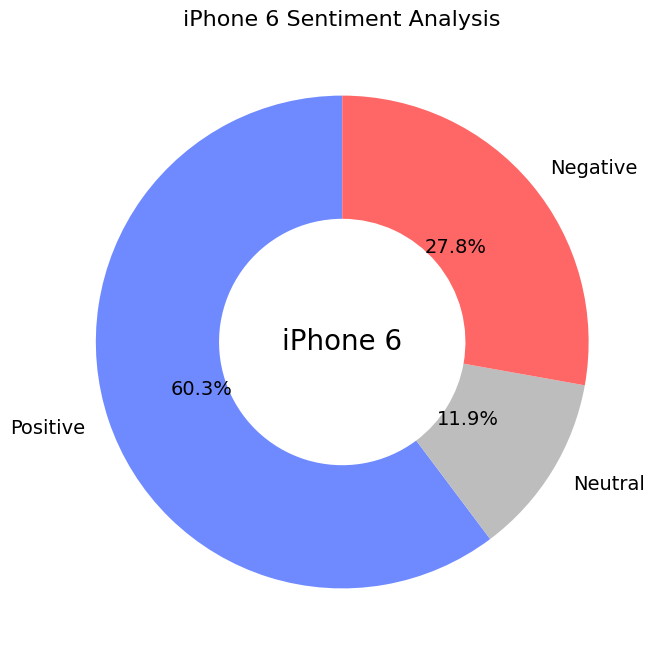

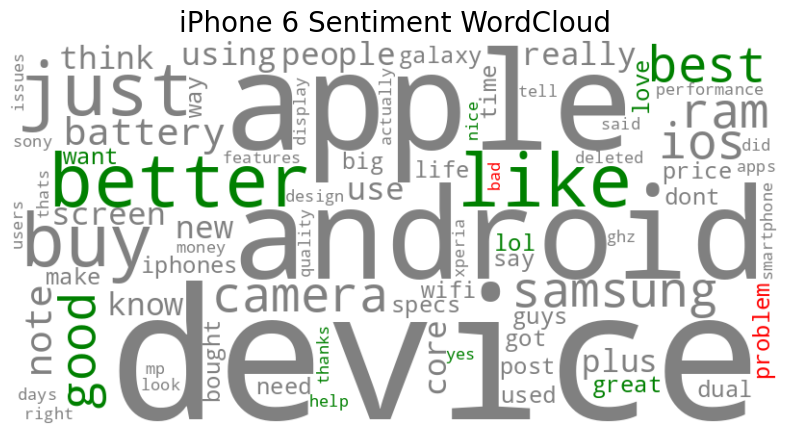

In [ ]:
# 1. TF-IDF 분석
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(all_review_texts_6)
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# 상위 100 단어 추출
top_words = [word for word, score in tfidf_scores[:100]]

# 2. 일반 워드클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 6 WordCloud', fontsize=20)
plt.show()

# 3. 감정 분석
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK 감정 분석기
sid = SentimentIntensityAnalyzer()

positive_reviews, neutral_reviews, negative_reviews = 0, 0, 0
for review in all_review_texts_6:
    sentiment_scores = sid.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.05:
        positive_reviews += 1
    elif sentiment_scores['compound'] <= -0.05:
        negative_reviews += 1
    else:
        neutral_reviews += 1

total_reviews = len(all_review_texts_6)
print(f"긍정 리뷰 비율: {positive_reviews / total_reviews * 100:.2f}%")
print(f"중립 리뷰 비율: {neutral_reviews / total_reviews * 100:.2f}%")
print(f"부정 리뷰 비율: {negative_reviews / total_reviews * 100:.2f}%")

# 4. 감성 분석 도넛 차트
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_reviews / total_reviews * 100, neutral_reviews / total_reviews * 100, negative_reviews / total_reviews * 100]
colors = ['#6f8aff', '#bdbdbd', '#ff6767']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.5}, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.text(0, 0, 'iPhone 6', ha='center', va='center', fontsize=20)
plt.title('iPhone 6 Sentiment Analysis', fontsize=16)
plt.show()

# 5. 긍부정 색상 포함 워드클라우드

# 감정에 따른 색상 지정 함수
def sentiment_color_func(word, *args, **kwargs):
    sentiment_scores = sid.polarity_scores(word)
    if sentiment_scores['compound'] >= 0.05:
        return 'green'  # 긍정
    elif sentiment_scores['compound'] <= -0.05:
        return 'red'    # 부정
    else:
        return 'gray'   # 중립

wordcloud_sentiment = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sentiment.recolor(color_func=sentiment_color_func), interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 6 Sentiment WordCloud', fontsize=20)
plt.show()


# 2016: iPhone 7, 2019: iPhone 11
'2016-09-16'~'2016-12-16'  

p137~p194  
https://www.gsmarena.com/apple_iphone_7-reviews-8064p137.php

'2019-09-20'~'2019-12-20'  

p78~p94  
https://www.gsmarena.com/apple_iphone_11-reviews-9848p93.php


In [ ]:
# iPhone 7 (2016)
all_review_texts_7 = []
for page in range(137, 195):
    url = f'https://www.gsmarena.com/apple_iphone_7-reviews-8064p{page}.php'
    reviews = get_reviews_from_page(url)
    for review in reviews:
        review_text = review.get_text(separator=" ").strip().lower()
        review_text = re.sub(r'\d+', '', review_text)
        all_review_texts_7.append(review_text.strip())

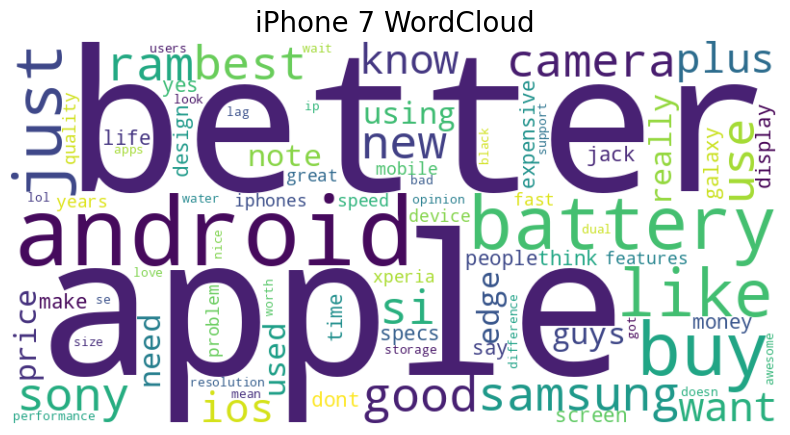

긍정 리뷰 비율: 60.09%
중립 리뷰 비율: 12.76%
부정 리뷰 비율: 27.16%


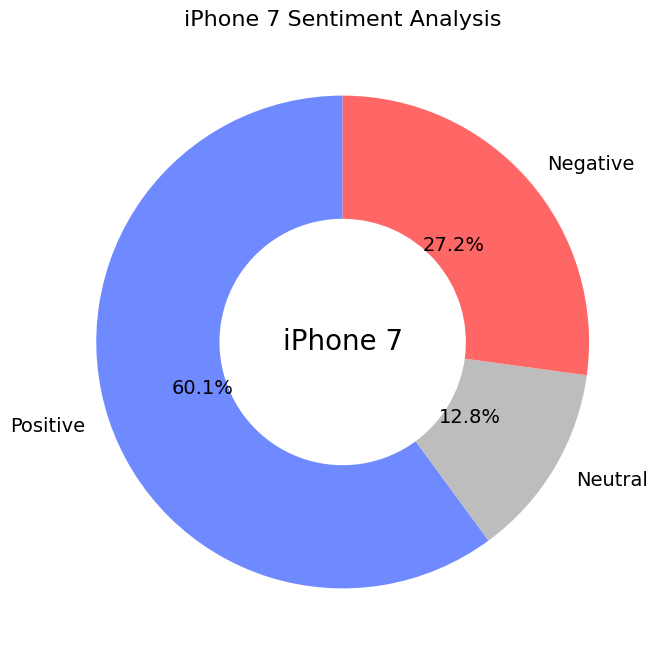

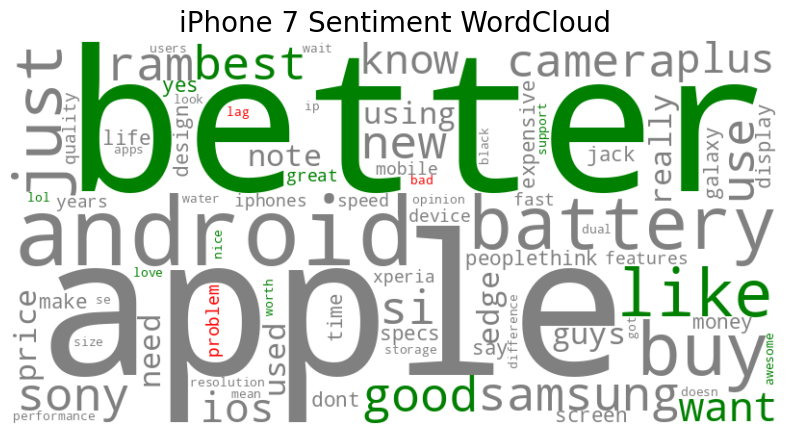

In [ ]:
# 1. TF-IDF 분석
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(all_review_texts_7)
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# 상위 100 단어 추출
top_words = [word for word, score in tfidf_scores[:100]]

# 2. 일반 워드클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 7 WordCloud', fontsize=20)
plt.show()

# 3. 감정 분석
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK 감정 분석기
sid = SentimentIntensityAnalyzer()

positive_reviews, neutral_reviews, negative_reviews = 0, 0, 0
for review in all_review_texts_7:
    sentiment_scores = sid.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.05:
        positive_reviews += 1
    elif sentiment_scores['compound'] <= -0.05:
        negative_reviews += 1
    else:
        neutral_reviews += 1

total_reviews = len(all_review_texts_7)
print(f"긍정 리뷰 비율: {positive_reviews / total_reviews * 100:.2f}%")
print(f"중립 리뷰 비율: {neutral_reviews / total_reviews * 100:.2f}%")
print(f"부정 리뷰 비율: {negative_reviews / total_reviews * 100:.2f}%")

# 4. 감성 분석 도넛 차트
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_reviews / total_reviews * 100, neutral_reviews / total_reviews * 100, negative_reviews / total_reviews * 100]
colors = ['#6f8aff', '#bdbdbd', '#ff6767']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.5}, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.text(0, 0, 'iPhone 7', ha='center', va='center', fontsize=20)
plt.title('iPhone 7 Sentiment Analysis', fontsize=16)
plt.show()

# 5. 긍부정 색상 포함 워드클라우드

# 감정에 따른 색상 지정 함수
def sentiment_color_func(word, *args, **kwargs):
    sentiment_scores = sid.polarity_scores(word)
    if sentiment_scores['compound'] >= 0.05:
        return 'green'  # 긍정
    elif sentiment_scores['compound'] <= -0.05:
        return 'red'    # 부정
    else:
        return 'gray'   # 중립

wordcloud_sentiment = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sentiment.recolor(color_func=sentiment_color_func), interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 7 Sentiment WordCloud', fontsize=20)
plt.show()

In [ ]:
# iPhone 11 (2019)
all_review_texts_11 = []
for page in range(78, 95):
    url = f'https://www.gsmarena.com/apple_iphone_11-reviews-9848p{page}.php'
    reviews = get_reviews_from_page(url)
    for review in reviews:
        review_text = review.get_text(separator=" ").strip().lower()
        review_text = re.sub(r'\d+', '', review_text)
        all_review_texts_11.append(review_text.strip())

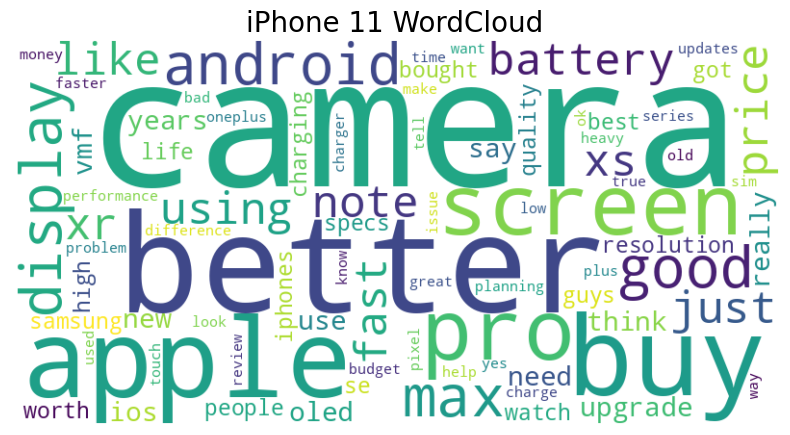

긍정 리뷰 비율: 59.12%
중립 리뷰 비율: 16.76%
부정 리뷰 비율: 24.12%


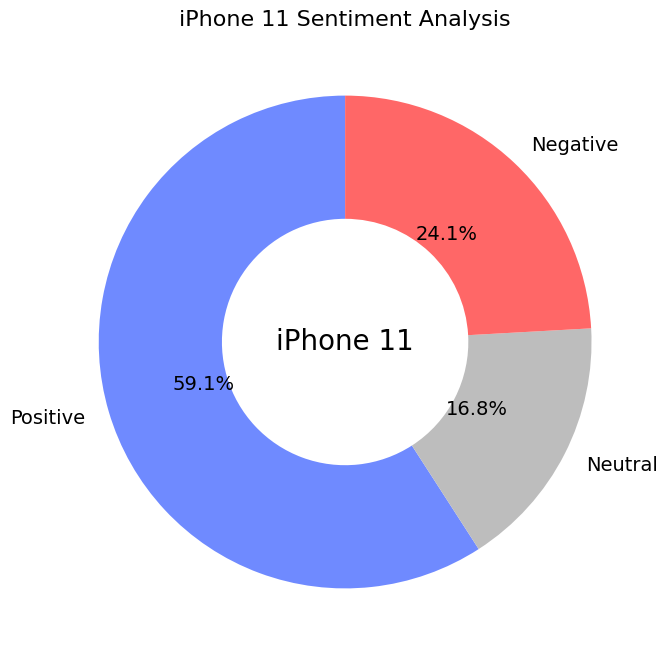

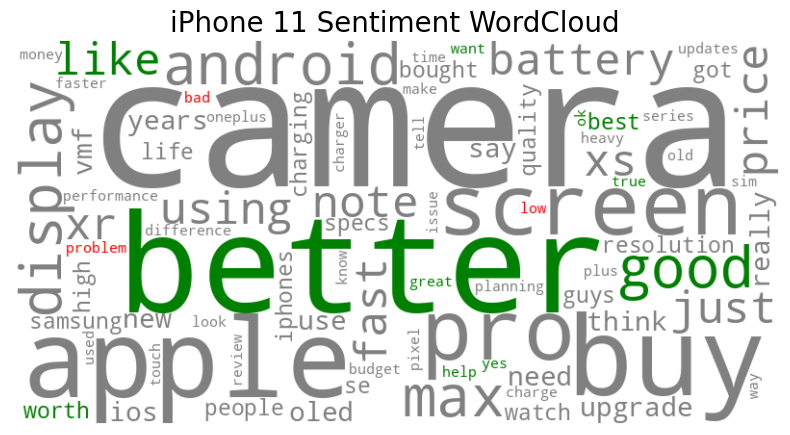

In [ ]:
# 1. TF-IDF 분석
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(all_review_texts_11)
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# 상위 100 단어 추출
top_words = [word for word, score in tfidf_scores[:100]]

# 2. 일반 워드클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 11 WordCloud', fontsize=20)
plt.show()

# 3. 감정 분석
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK 감정 분석기
sid = SentimentIntensityAnalyzer()

positive_reviews, neutral_reviews, negative_reviews = 0, 0, 0
for review in all_review_texts_11:
    sentiment_scores = sid.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.05:
        positive_reviews += 1
    elif sentiment_scores['compound'] <= -0.05:
        negative_reviews += 1
    else:
        neutral_reviews += 1

total_reviews = len(all_review_texts_11)
print(f"긍정 리뷰 비율: {positive_reviews / total_reviews * 100:.2f}%")
print(f"중립 리뷰 비율: {neutral_reviews / total_reviews * 100:.2f}%")
print(f"부정 리뷰 비율: {negative_reviews / total_reviews * 100:.2f}%")

# 4. 감성 분석 도넛 차트
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_reviews / total_reviews * 100, neutral_reviews / total_reviews * 100, negative_reviews / total_reviews * 100]
colors = ['#6f8aff', '#bdbdbd', '#ff6767']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.5}, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.text(0, 0, 'iPhone 11', ha='center', va='center', fontsize=20)
plt.title('iPhone 11 Sentiment Analysis', fontsize=16)
plt.show()

# 5. 긍부정 색상 포함 워드클라우드

# 감정에 따른 색상 지정 함수
def sentiment_color_func(word, *args, **kwargs):
    sentiment_scores = sid.polarity_scores(word)
    if sentiment_scores['compound'] >= 0.05:
        return 'green'  # 긍정
    elif sentiment_scores['compound'] <= -0.05:
        return 'red'    # 부정
    else:
        return 'gray'   # 중립

wordcloud_sentiment = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sentiment.recolor(color_func=sentiment_color_func), interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 11 Sentiment WordCloud', fontsize=20)
plt.show()


# 2021: iPhone 13
'2021-09-15'~'2021-12-15'  

p31~p46  
https://www.gsmarena.com/apple_iphone_13-reviews-11103p31.php


In [ ]:
# iPhone 13 (2021)
all_review_texts_13 = []
for page in range(31, 47):
    url = f'https://www.gsmarena.com/apple_iphone_13-reviews-11103p{page}.php'
    reviews = get_reviews_from_page(url)
    for review in reviews:
        review_text = review.get_text(separator=" ").strip().lower()
        review_text = re.sub(r'\d+', '', review_text)
        all_review_texts_13.append(review_text.strip())

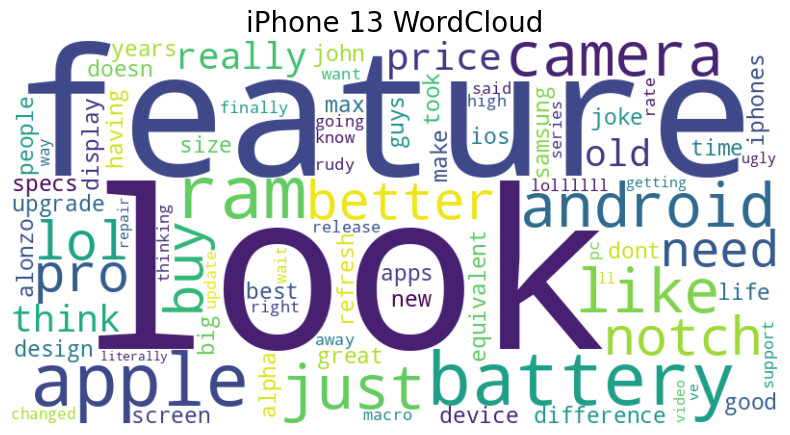

긍정 리뷰 비율: 54.61%
중립 리뷰 비율: 21.05%
부정 리뷰 비율: 24.34%


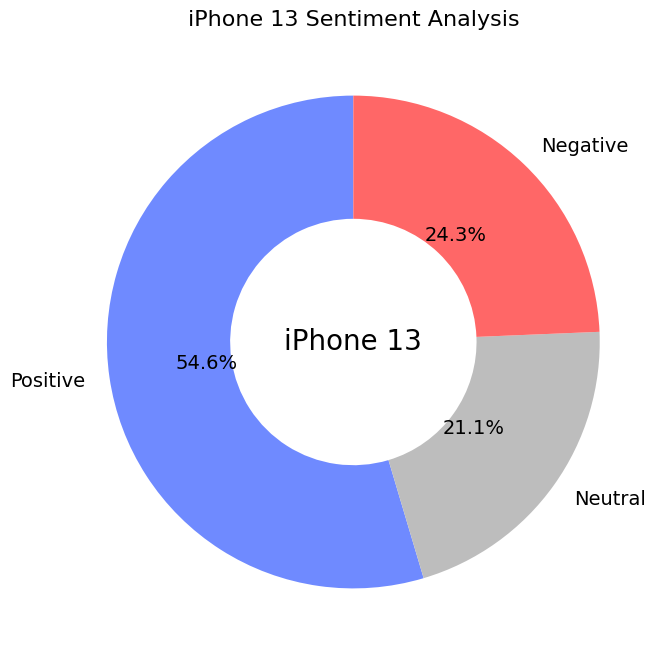

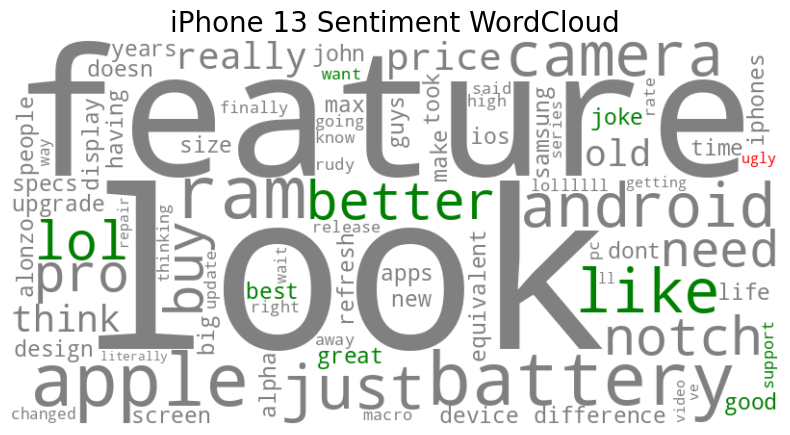

In [ ]:
# 1. TF-IDF 분석
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(all_review_texts_13)
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# 상위 100 단어 추출
top_words = [word for word, score in tfidf_scores[:100]]

# 2. 일반 워드클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 13 WordCloud', fontsize=20)
plt.show()

# 3. 감정 분석
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK 감정 분석기
sid = SentimentIntensityAnalyzer()

positive_reviews, neutral_reviews, negative_reviews = 0, 0, 0
for review in all_review_texts_13:
    sentiment_scores = sid.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.05:
        positive_reviews += 1
    elif sentiment_scores['compound'] <= -0.05:
        negative_reviews += 1
    else:
        neutral_reviews += 1

total_reviews = len(all_review_texts_13)
print(f"긍정 리뷰 비율: {positive_reviews / total_reviews * 100:.2f}%")
print(f"중립 리뷰 비율: {neutral_reviews / total_reviews * 100:.2f}%")
print(f"부정 리뷰 비율: {negative_reviews / total_reviews * 100:.2f}%")

# 4. 감성 분석 도넛 차트
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_reviews / total_reviews * 100, neutral_reviews / total_reviews * 100, negative_reviews / total_reviews * 100]
colors = ['#6f8aff', '#bdbdbd', '#ff6767']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.5}, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.text(0, 0, 'iPhone 13', ha='center', va='center', fontsize=20)
plt.title('iPhone 13 Sentiment Analysis', fontsize=16)
plt.show()

# 5. 긍부정 색상 포함 워드클라우드

# 감정에 따른 색상 지정 함수
def sentiment_color_func(word, *args, **kwargs):
    sentiment_scores = sid.polarity_scores(word)
    if sentiment_scores['compound'] >= 0.05:
        return 'green'  # 긍정
    elif sentiment_scores['compound'] <= -0.05:
        return 'red'    # 부정
    else:
        return 'gray'   # 중립

wordcloud_sentiment = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sentiment.recolor(color_func=sentiment_color_func), interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 13 Sentiment WordCloud', fontsize=20)
plt.show()


# 2023: iPhone 15
'2023-09-22'~'2023-12-22'  

p9~p15  
https://www.gsmarena.com/apple_iphone_15-reviews-12559p9.php

In [ ]:
# iPhone 15 (2023)
all_review_texts_15 = []
for page in range(9, 16):
    url = f'https://www.gsmarena.com/apple_iphone_15-reviews-12559p{page}.php'
    reviews = get_reviews_from_page(url)
    for review in reviews:
        review_text = review.get_text(separator=" ").strip().lower()
        review_text = re.sub(r'\d+', '', review_text)
        all_review_texts_15.append(review_text.strip())

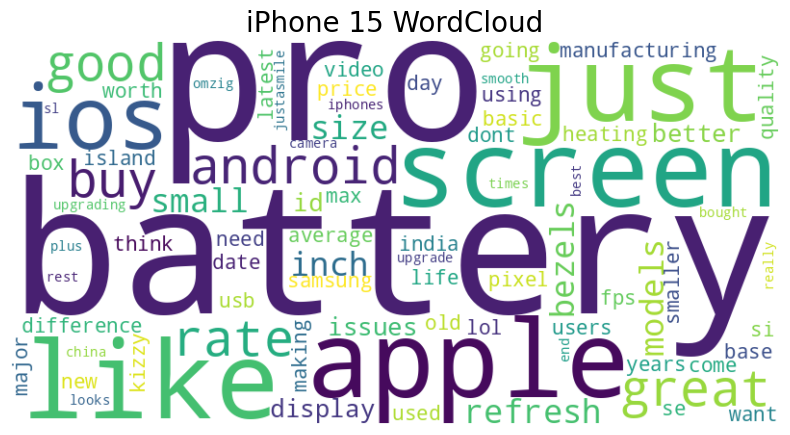

긍정 리뷰 비율: 60.71%
중립 리뷰 비율: 22.86%
부정 리뷰 비율: 16.43%


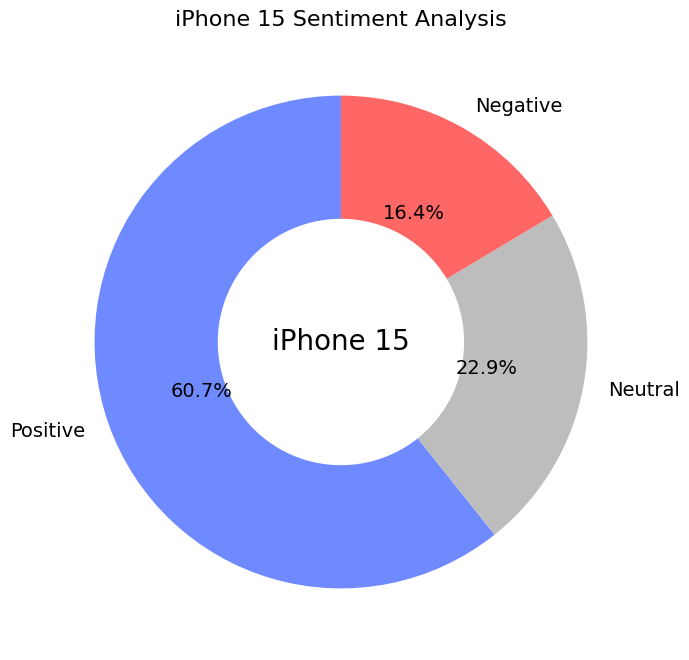

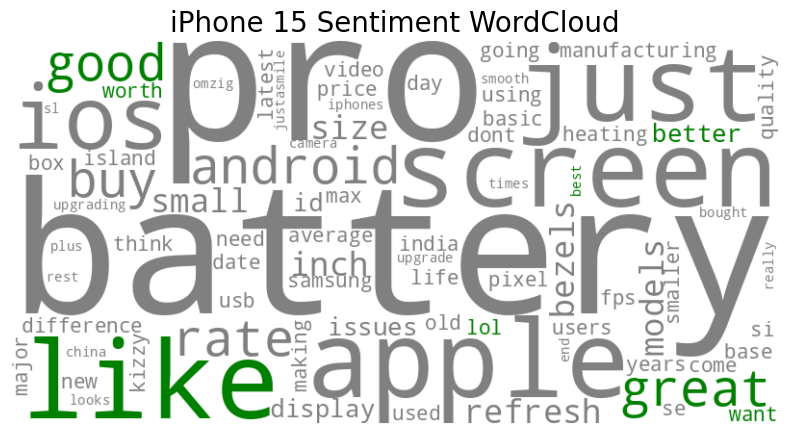

In [ ]:
# 1. TF-IDF 분석
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(all_review_texts_15)
tfidf_scores = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# 상위 100 단어 추출
top_words = [word for word, score in tfidf_scores[:100]]

# 2. 일반 워드클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 15 WordCloud', fontsize=20)
plt.show()

# 3. 감정 분석
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK 감정 분석기
sid = SentimentIntensityAnalyzer()

positive_reviews, neutral_reviews, negative_reviews = 0, 0, 0
for review in all_review_texts_15:
    sentiment_scores = sid.polarity_scores(review)
    if sentiment_scores['compound'] >= 0.05:
        positive_reviews += 1
    elif sentiment_scores['compound'] <= -0.05:
        negative_reviews += 1
    else:
        neutral_reviews += 1

total_reviews = len(all_review_texts_15)
print(f"긍정 리뷰 비율: {positive_reviews / total_reviews * 100:.2f}%")
print(f"중립 리뷰 비율: {neutral_reviews / total_reviews * 100:.2f}%")
print(f"부정 리뷰 비율: {negative_reviews / total_reviews * 100:.2f}%")

# 4. 감성 분석 도넛 차트
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive_reviews / total_reviews * 100, neutral_reviews / total_reviews * 100, negative_reviews / total_reviews * 100]
colors = ['#6f8aff', '#bdbdbd', '#ff6767']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.5}, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.text(0, 0, 'iPhone 15', ha='center', va='center', fontsize=20)
plt.title('iPhone 15 Sentiment Analysis', fontsize=16)
plt.show()

# 5. 긍부정 색상 포함 워드클라우드

# 감정에 따른 색상 지정 함수
def sentiment_color_func(word, *args, **kwargs):
    sentiment_scores = sid.polarity_scores(word)
    if sentiment_scores['compound'] >= 0.05:
        return 'green'  # 긍정
    elif sentiment_scores['compound'] <= -0.05:
        return 'red'    # 부정
    else:
        return 'gray'   # 중립

wordcloud_sentiment = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, random_state=42).generate(' '.join(top_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sentiment.recolor(color_func=sentiment_color_func), interpolation='bilinear')
plt.axis('off')
plt.title('iPhone 15 Sentiment WordCloud', fontsize=20)
plt.show()